# Exercise 1


## Supervised Learning- Classification Models

---

## Overview

Welcome to this exercise. We are now going to use our new skills to build our supervised learning models that use classification approach.

---

Let's start by upgrading the `yfinance` module to the latest version. Run the following code block to upgrade it, then click the menu item at the top: **Kernel** > **Restart**, before running the remaining code blocks.

In [1]:
!pip install --upgrade yfinance


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


We also need to install `lxml` since we will be working with an XML document (no need to restart the kernel after running this command, since we're not upgrading).

In [2]:
!pip install lxml


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install statsmodels


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import sys
import os

# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../../'))# Add the path to sys.path
sys.path.append(func_lib_path)

# Now you can import func_lib
import func_lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [5]:
dir(func_lib)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'calculate_rsi',
 'compute_BM_Perf',
 'compute_returns',
 'compute_strat_perf',
 'create_hist_prices',
 'find_elbow_point',
 'np',
 'pd',
 'plot_optimal_cluster_point',
 'plt',
 'yf']

In [6]:
# Retrieve historical price data.
# - Use the 'createHistPrices()' function from 'func_lib' to get historical price data.
# - Assign the result to the variable 'historical_prices'.

historical_prices = func_lib.create_hist_prices()

# Define the list of momentum periods.
# - Create a list containing different time periods for calculating momentum indicators.
# - Assign this list to the variable 'list_of_momentums'.

list_of_momentums = [1, 5, 15, 20]

# Compute returns based on historical prices and momentum periods.
# - Use the 'computingReturns()' function from 'func_lib' with 'historical_prices' and 'list_of_momentums' as inputs.
# - Assign the result to the variable 'total_returns'.

total_returns = func_lib.compute_returns(historical_prices, list_of_momentums)

# Remove any rows with missing values from the returns data.
# - Use the 'dropna()' method to remove rows with NaN values from 'total_returns'.
# - Apply the change in place to modify the DataFrame directly.

total_returns.dropna(inplace=True)


[*********************100%***********************]  501 of 501 completed

1 Failed download:
['SW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2000-01-01 -> 2024-05-01) (Yahoo error = "Data doesn\'t exist for startDate = 946702800, endDate = 1714536000")')


In [7]:
# Convert 'F_1_d_returns' to binary values based on whether they are positive or not.
# - Use the 'apply()' function with a lambda expression to create a new column 'F_1_d_returns_Ind'.
# - The lambda expression assigns 1 if the value is greater than 0, otherwise assigns 0.

total_returns['F_1_d_returns_Ind'] = total_returns['F_1_d_returns'].apply(lambda x: 1 if x > 0 else 0)
# Display the updated DataFrame.
total_returns.head()

F_1_d_returns  1_d_returns  5_d_returns  15_d_returns  \
Ticker Date                                                                
A      2000-02-01       0.077465     0.072710     0.048938      0.029918   
       2000-02-02       0.016340     0.077465     0.119854      0.125000   
       2000-02-03      -0.019292     0.016340     0.136073      0.166979   
       2000-02-04       0.042623    -0.019292     0.120294      0.127542   
       2000-02-07      -0.006289     0.042623     0.201133      0.162705   

                   20_d_returns  F_1_d_returns_Ind  
Ticker Date                                         
A      2000-02-01     -0.013889                  1  
       2000-02-02      0.150376                  1  
       2000-02-03      0.246493                  0  
       2000-02-04      0.270833                  1  
       2000-02-07      0.223077                  0

In [8]:
# Determine the split index for 70% of the dates.
# - Extract the unique dates from the index of 'total_returns'.
# - Calculate the split date by indexing into the unique dates to get the date corresponding to 70% of the total length of unique dates.
# - Assign this date to the variable 'split_date' and display it.

unique_dates = total_returns.index.get_level_values('Date').unique()
split_date = unique_dates[int(0.7 * len(unique_dates))]
print(split_date)

2017-01-20 00:00:00


In [9]:
# Create the training set: all data before the split date.
# - Use the 'loc[]' indexer to select rows from 'total_returns' where the date in the index is earlier than 'split_date'.
# - Assign this subset of data to the variable 'train_data'.
train_data = total_returns.loc[total_returns.index.get_level_values('Date') < split_date]

# Create the testing set: all data from the split date onwards.
# - Use the 'loc[]' indexer to select rows from 'total_returns' where the date in the index is equal to or later than 'split_date'.
# - Assign this subset of data to the variable 'test_data'.
test_data = total_returns.loc[total_returns.index.get_level_values('Date') >= split_date]



In [10]:
# Extract the target variable for testing.
# - Select the 'F_1_d_returns' column from the 'test_data' DataFrame.
# - Assign this column to the variable 'total_returns'.
total_returns = test_data['F_1_d_returns']



In [11]:
# Define the features and target variables.
# - Specify the columns to be used as features ('1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns').
# - Specify the column to be used as the target variable ('F_1_d_returns_Ind').
features = ['1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns']
target = ['F_1_d_returns_Ind']

# Split the data into training and testing sets.
# - Extract the feature columns from the training data and testing data.
X_train = train_data[features]
X_test = test_data[features]
# - Extract the target column from the training data and testing data.
y_train = train_data[target]
y_test = test_data[target]


In [12]:
# Standardize the features.
# - Create an instance of 'StandardScaler' for scaling the features.
# - Fit the scaler to the training data and transform both the training and testing feature sets.
# - Convert the scaled arrays back to DataFrames with the same index and column names as the original feature sets.
scaler = StandardScaler()

# Scale the training features
X_train_scaled = scaler.fit_transform(X_train)
# Scale the testing features
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)


In [13]:
# Add a constant to the model (intercept).
# - Use the 'add_constant()' function from the statsmodels library to add an intercept term to the feature sets.
# - Apply this to both the training and testing feature sets.

X_train_scaled_const_add = sm.add_constant(X_train_scaled)
X_test_scaled_const_add  = sm.add_constant(X_test_scaled)

# Create and fit a logistic regression model.
# - Initialize a logistic regression model using 'sm.Logit()' with the target and feature sets including the intercept.
# - Fit the model to the training data.

model = sm.Logit(y_train, X_train_scaled_const_add).fit()

# Print the model summary.
# - Use 'summary()' to display the detailed results and statistics of the fitted model.

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.692566
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      F_1_d_returns_Ind   No. Observations:              1783882
Model:                          Logit   Df Residuals:                  1783877
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Jun 2025   Pseudo R-squ.:               0.0006173
Time:                        12:48:22   Log-Likelihood:            -1.2355e+06
converged:                       True   LL-Null:                   -1.2362e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0351      0.001     23.402      0.000       0.032       0.038
1_d_returns     -0.0294

In [14]:
# Set the model name.
# - Assign the name 'Log' to the variable 'model_name' to label the regression model.
model_name = 'Log'

# Make predictions using the fitted model.
# - Use 'model.predict()' to generate predictions based on the scaled testing features with the added constant.
y_pred = model.predict(X_test_scaled_const_add)

# Create DataFrames for the actual and predicted values.
# - Convert the true target values 'y_test' and predicted values 'y_pred' to DataFrames.
# - Rename the column in 'y_pred_df' to match the model name.

y_test_df = pd.DataFrame(y_test)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.rename(columns={0: model_name}, inplace=True)

# Combine the actual and predicted values into one DataFrame.
# - Use 'pd.merge()' to merge 'y_pred_df' with 'total_returns' on their index.
# - This combines the predicted values with the actual returns data.

y_test_and_pred = pd.merge(y_pred_df, total_returns, left_index=True, right_index=True)


In [15]:
# Define a trading strategy based on logistic regression predictions.
# - Create a function 'trading_strategy' that takes the predicted value 'y_pred' as input.
# - If the predicted value is greater than 0.5, return 1 (indicating a "Go long" signal).
# - Otherwise, return 0 (indicating no action or "Do nothing").
def trading_strategy(y_pred):
    return 1 if y_pred > 0.5 else 0


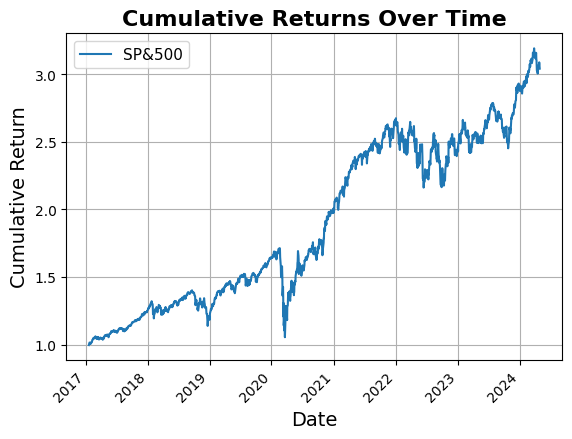

The CAGR is: 16.43%
Sharpe Ratio of Strategy: 0.87


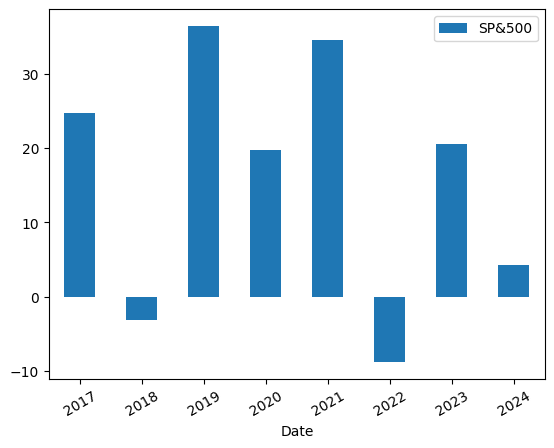

In [16]:
# Compute performance metrics based on the predictions and actual returns.
# - Use the 'func_lib.compute_BM_Perf()' function to calculate cumulative and calendar returns.
# - Pass the DataFrame 'y_test_and_pred' containing the actual and predicted values as an argument.
cum_returns, calendar_returns = func_lib.compute_BM_Perf(y_test_and_pred)


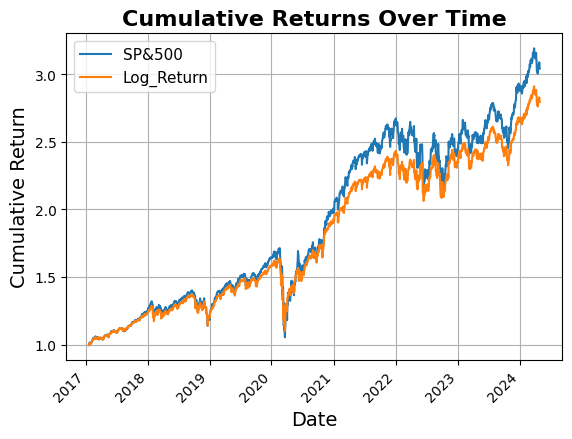

The CAGR is: 15.09%
Sharpe Ratio of Strategy: 0.92


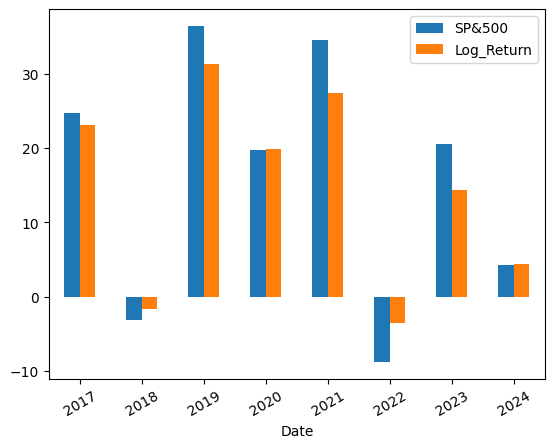

In [17]:
# Compute strategy performance metrics.
# - Use the 'func_lib.compute_strat_perf()' function to calculate the performance of the trading strategy.
# - Pass the following arguments:
#   - 'y_test_and_pred': The DataFrame containing actual and predicted values.
#   - 'cum_returns': Cumulative returns calculated previously.
#   - 'calendar_returns': Calendar returns calculated previously.
#   - 'trading_strategy': The function defining the trading strategy based on predictions.
#   - 'model_name': The name of the model to include in the performance evaluation.
cum_returns, calendar_returns = func_lib.compute_strat_perf(y_test_and_pred, cum_returns, calendar_returns, trading_strategy, model_name)
